In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/instacart"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [ ]:
order_products_train_df = pd.read_csv("/content/drive/MyDrive/instacart/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/instacart/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/instacart/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/instacart/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/instacart/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/instacart/departments.csv")


In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


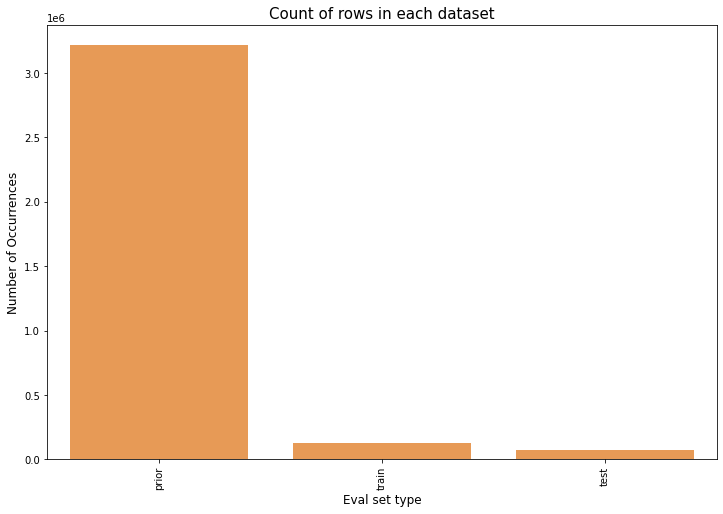

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


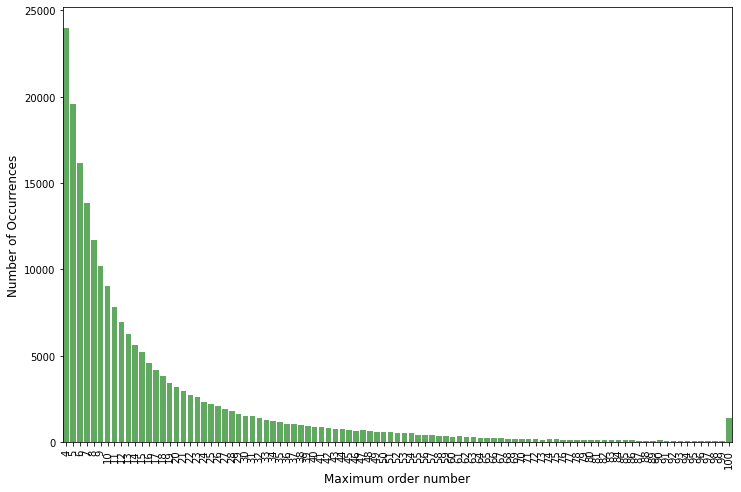

In [ ]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

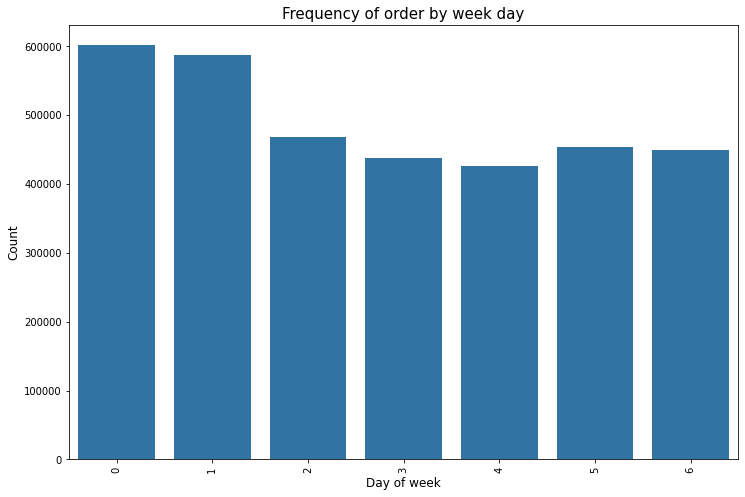

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

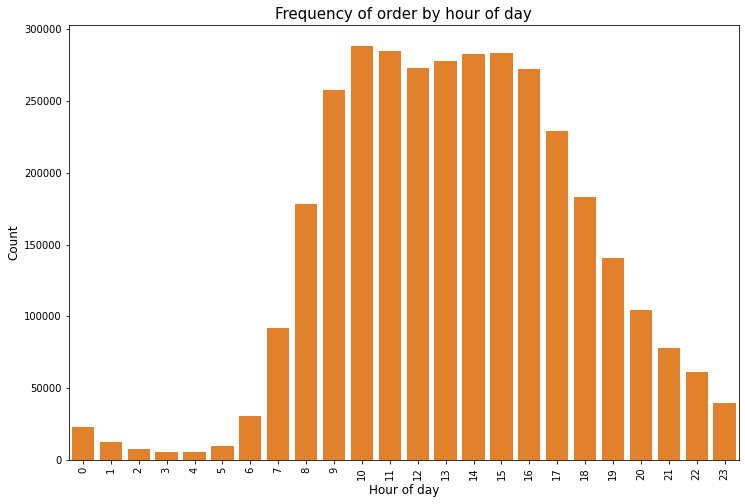

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

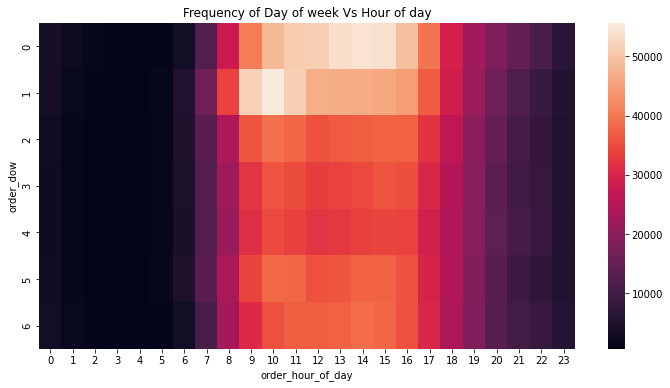

In [ ]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

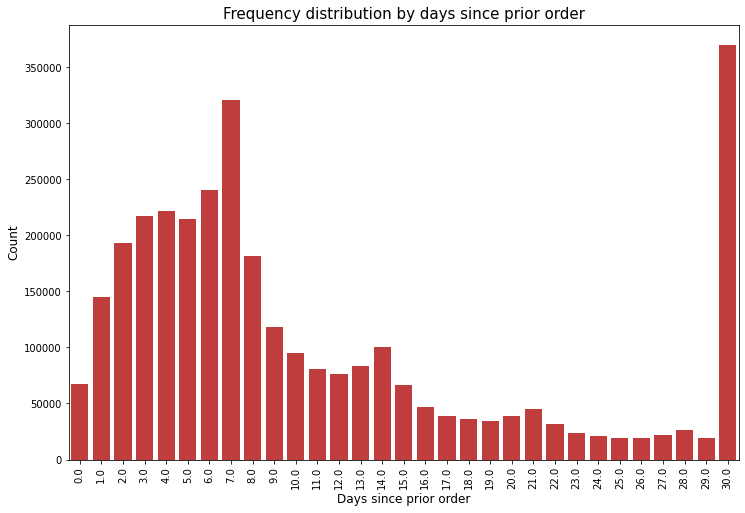

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [ ]:
# percentage of re-orders in prior set
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]


0.5896974667922161

In [ ]:
# percentage of re-orders in test set 
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [ ]:
#Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

# Import the regression libraries
from sklearn.linear_model import SGDRegressor
from sklearn import metrics


lireg=LinearRegression()
lireg.fit(X_train,Y_train)
pre=lireg.predict(X_test)
preLR=pre

plot_future(pre, 'Next Date Buy Prediction Linear Regression', Y_test)

evaluate_prediction(pre, Y_test, 'Next Date Buy Prediction Linear Regression')

def LRPrediction(user_id):
    custo=time_series_data[time_series_data['user_id']==user_id]
    Cust_X=np.array(custo[['Time_Series_Input1','Time_Series_Input2']])
    Cust_Y=np.array(custo[['Time_Series_Output']])
    pre=lireg.predict(Cust_X)
    plot_future(pre, 'Next Date Buy Prediction User '+str(user_id)+' using Linear Regression', Cust_Y)
    

In [ ]:
#XGBoost
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import seaborn as sns

import xgboost as xgb
from sklearn import metrics, model_selection

import tikzplotlib

#load the data set
df_features = pd.read_pickle("df_features_final_var.pkl")
df_features

# Correlation matrix showing the correlation between the features 
correlation_matrix = df_features.corr()
labels_corr_features = correlation_matrix.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df_features[labels_corr_features].corr(), annot = True)

from sklearn.model_selection import train_test_split

#split the data into a train and test set
train, validation = train_test_split(df_features, test_size=0.2, random_state= 1)

X_train = train.drop(['t_0'], axis = 1)
y_train = train['t_0']

X_validation = validation.drop(['t_0'], axis = 1)
y_validation = validation['t_0']

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_validation)
y_predict_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('Mean Absolute error validation set:', mean_absolute_error(y_validation,y_predict))
print('Mean Absolute error train set:', mean_absolute_error(y_train,y_predict_train))


model = xgb.XGBRegressor()

xgb_2best_model = xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# model with best hyperparameters
xgb_best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=13, min_child_weight=2, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

xgb_2best_model.fit(X_train, y_train)

y_predict = xgb_2best_model.predict(X_validation)
y_predict_train = xgb_2best_model.predict(X_train)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('Mean Absolute error validation set:', mean_absolute_error(y_validation,y_predict))
print('Mean Absolute error train set:', mean_absolute_error(y_train,y_predict_train))
print('R2 validation set:', r2_score(y_validation,y_predict))
print('R2 train set:', r2_score(y_train,y_predict_train))
print('RMSE validation set:', mean_squared_error(y_validation,y_predict))
print('RMSE train set:', mean_squared_error(y_train,y_predict_train))

xgb_best_model.fit(X_train, y_train)

y_predict = xgb_best_model.predict(X_validation)
y_predict_train = xgb_best_model.predict(X_train)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('Mean Absolute error validation set:', mean_absolute_error(y_validation,y_predict))
print('Mean Absolute error train set:', mean_absolute_error(y_train,y_predict_train))
print('R2 validation set:', r2_score(y_validation,y_predict))
print('R2 train set:', r2_score(y_train,y_predict_train))
print('RMSE validation set:', mean_squared_error(y_validation,y_predict))
print('RMSE train set:', mean_squared_error(y_train,y_predict_train))

_ = xgb.plot_importance(xgb_2best_model, height=0.9)

_ = xgb.plot_importance(xgb_best_model, height=0.9)

## Test it on the Test set

#load the data set
df_test = pd.read_pickle("df_test_final_var.pkl")
df_test['variance'] = np.sqrt(df_test['variance'])
df_test = df_test.drop(['product_seq', 'days_since_seq'], axis = 1)
df_test
# df_val = df_val.drop(['max_days','min_days','avg_days'], axis = 1)

X_test = df_test.drop(['t_0','num_times_purchased'], axis = 1)
y_test = df_test['t_0']



In [ ]:
#ANN
#code partly offered by Droomer and Bekker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

#load the data set
df = pd.read("df")
df_label = df['t_0']
df_features = df.drop(['t_0'], axis = 1)
len(df_features.columns)

#set scaler
scaler_feature = MinMaxScaler()
scaler_label = MinMaxScaler()

#scale features
scaler_feature.fit(df_features)
scaled_features = scaler_feature.transform(df_features)

# define a baseline model
input_dimensions = len(df_features.columns)
num_output_values = 1

model = Sequential()
model.add(Dense(input_dimensions, input_dim = input_dimensions, kernel_initializer='normal', activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(num_output_values, kernel_initializer = 'normal'))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

#scale the labels
scaler_label.fit(np.array(df_label).reshape(-1,1))
scaled_labels = scaler_label.transform(np.array(df_label).reshape(-1,1))

#train the model
history = model.fit(scaled_features, scaled_labels, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

### Testing the neural network model on the test set.

#load the data set
df_val = pd.read_pickle("df_test_final_var.pkl")
df_val['variance'] = np.sqrt(df_val['variance'])
df_val = df_val.drop(['product_seq', 'days_since_seq'], axis = 1)


#scaling the test set with the same scalers as the training set
X_test = df_val.drop(['t_0','num_times_purchased'], axis = 1)
y_test = df_val['t_0']

scaled_features_test = scaler_feature.transform(X_test)
scaled_labels_test = scaler_label.transform(np.array(y_test).reshape(-1,1))

#making the next purchase date predictions
predictions = model.predict(scaled_features_test)

#scaling the predictions back so that it can be compared with the target variable
prediction_scaled_back = scaler_label.inverse_transform(predictions)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction_scaled_back))

#plotting the absolute error
sorted_values_nn = np.sort(np.abs(y_test - prediction_scaled_back.ravel()))
plt.plot(sorted_values_nn)
plt.show()

prediction_scaled_back[prediction_scaled_back < 0] = 0

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction_scaled_back))

# Scaled Neural Network StandardScaler

#set scaler
scaler_feature = StandardScaler()
scaler_label = StandardScaler()

#scale features
scaler_feature.fit(df_features)
scaled_features = scaler_feature.transform(df_features)

# define a baseline model
input_dimensions = len(df_features.columns)
num_output_values = 1

model = Sequential()
model.add(Dense(input_dimensions, input_dim = input_dimensions, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(num_output_values, kernel_initializer = 'normal'))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

#scale the labels
scaler_label.fit(np.array(df_label).reshape(-1,1))
scaled_labels = scaler_label.transform(np.array(df_label).reshape(-1,1))

#train the model
history = model.fit(scaled_features, scaled_labels, epochs=50, batch_size=100,  verbose=1, validation_split=0.2)

### Making NPD predictions for the test set

#load the data set
df_val = pd.read_pickle("df_test_final_var.pkl")
df_val['variance'] = np.sqrt(df_val['variance'])
df_val = df_val.drop(['product_seq', 'days_since_seq'], axis = 1)


#scaling the test set with the same scalers as the training set
X_test = df_val.drop(['t_0','num_times_purchased'], axis = 1)
y_test = df_val['t_0']

scaled_features_test = scaler_feature.transform(X_test)
scaled_labels_test = scaler_label.transform(np.array(y_test).reshape(-1,1))

#making the next purchase date predictions
predictions = model.predict(scaled_features_test)

#scaling the predictions back so that it can be compared with the target variable
prediction_scaled_back = scaler_label.inverse_transform(predictions)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction_scaled_back))

#plotting the absolute error
sorted_values_nn = np.sort(np.abs(y_test - prediction_scaled_back.ravel()))
plt.plot(sorted_values_nn)
plt.show()

In [ ]:
#RNN
#from Droomer & Bekker
import torch
from torch import nn
import torch.nn.init as init
from torch.autograd import Variable

class two_feature_RNN(nn.Module):
    def __init__(self, hidden_size = 10, num_layers = 1):
        
        super(two_feature_RNN, self).__init__()
        
        #define the properties
        self.num_feat = 2
        self.num_batch = 1
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        output_size = 1
        
        #define the rnn
        self.rnn = nn.RNN(input_size = self.num_feat, 
                          hidden_size = self.hidden_size, 
                          num_layers = self.num_layers,
                          nonlinearity = 'relu')
        self.out_layer = nn.Linear(self.hidden_size, output_size)
        
    def forward(self, inputs):
    
        #initialize the hidden layer
        h0 = torch.zeros(self.num_layers, self.num_batch, self.hidden_size)
        
        #forward pass
        output_rnn, hn = self.rnn(inputs, h0)
        output_out_layer = self.out_layer(output_rnn)
        
        return output_out_layer, hn

    def train(self,data, n_epochs, lr = 0.01, weight_decay = 0.01):
        '''
        Call this to train on a series of data
        '''
        seq_length = data.shape[0]-1

        inputs = Variable(torch.from_numpy(data[:-1,:]).float())
        inputs = torch.reshape(inputs,(seq_length,1,self.num_feat))
        targets = Variable(torch.from_numpy(data[1:,0]).float())
        targets = torch.reshape(targets,(seq_length,1,1))
        
        #convert the input data to tensors
#         inputs = Variable( torch.from_numpy(data[:-1]).float())
#         inputs = torch.reshape(inputs,(seq_length,1,1))
#         targets = Variable(torch.from_numpy(data[1:]).float())
#         targets = torch.reshape(targets,(seq_length,1,1))

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01 , weight_decay = weight_decay)
        
        for epoch in range(n_epochs):
    
            outputs, hidden = self(inputs)

            optimizer.zero_grad()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            if epoch%50 == 0:
                print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
                print("Loss: {:.4f}".format(loss.item()))
                
    def predict(self,data,n=4):
        '''
        Send a series in and receive the prediction
        '''
        
        inputs = Variable( torch.from_numpy(data).float())
        inputs = torch.reshape(inputs,(data.shape[0],1,self.num_feat))
        
        out, hidden = self.forward(inputs)
        
        return out.detach().numpy()[:,0,0]


class SimpleRNN(nn.Module):
    def __init__(self):
        
        super(SimpleRNN, self).__init__()
        
        #define the properties
        num_feat = 1
        self.num_batch = 1
        self.hidden_size = 10
        self.num_layers = 1

        output_size = 1
        
        #define the rnn
        self.rnn = nn.RNN(input_size = num_feat, 
                          hidden_size = self.hidden_size, 
                          num_layers = self.num_layers,
                          nonlinearity = 'relu')
        self.out_layer = nn.Linear(self.hidden_size, output_size)
        
    def forward(self, inputs):
    
        #initialize the hidden layer
        h0 = torch.zeros(self.num_layers, self.num_batch, self.hidden_size)
        
        #forward pass
        output_rnn, hn = self.rnn(inputs, h0)
        output_out_layer = self.out_layer(output_rnn)
        
        return output_out_layer, hn

    def train(self,data, n_epochs, lr = 0.01, weight_decay = 0.1):
        '''
        Call this to train on a series of data
        '''
        seq_length = data.shape[0]-1
        #convert the input data to tensors
        inputs = Variable( torch.from_numpy(data[:-1]).float())
        inputs = torch.reshape(inputs,(seq_length,1,1))
        targets = Variable(torch.from_numpy(data[1:]).float())
        targets = torch.reshape(targets,(seq_length,1,1))

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01 , weight_decay = weight_decay)
        
        for epoch in range(n_epochs):
    
            outputs, hidden = self(inputs)

            optimizer.zero_grad()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            if epoch%500 == 0:
                print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
                print("Loss: {:.4f}".format(loss.item()))
                
    def predict(self,data,n=4):
        '''
        Send a series in and receive the prediction
        '''
        
        inputs = Variable( torch.from_numpy(data).float())
        inputs = torch.reshape(inputs,(data.shape[0],1,1))
        
        out, hidden = self.forward(inputs)
        
        return out.detach().numpy()[:,0,0]
    
    

In [ ]:
#Recommender System
Order_Infor_1=orders[['order_id','user_id']]

Order_Infor_1.head(5)

Order_Infor_2=order_train[['order_id','product_id']]

Order_Infor_2.head()

Order_Infor_3=products[['product_id','product_name']]

Order_Infor_3.head(5)

Order_Infor_4=pd.merge(Order_Infor_1, Order_Infor_2, on='order_id')

Order_Infor_4=pd.merge(Order_Infor_3, Order_Infor_4, on='product_id')

Order_Infor_4.shape

Order_Infor_4.head(10)

Number_of_item_per_user=Order_Infor_4.groupby("user_id")['product_id'].count().reset_index()

Number_of_item_per_user.columns=['user_id','count']

# plot histogram
import plotly.express as px

hist_fig = px.histogram(Number_of_item_per_user, 
                        x="count", 
                        title="Number of orders per user", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="number of orders", 
                       yaxis_title="Number of users"
                      )

hist_fig.show(config={'displaylogo': False})

Number_of_item_per_user['count'].max()

Number_of_item_per_user['count'].min()

Selected_Users=Number_of_item_per_user[(Number_of_item_per_user['count']<25) & (Number_of_item_per_user['count']>20)]

## select 10 as threshold

Selected_Users=list(Selected_Users['user_id'])

Final_Selection=Order_Infor_4[Order_Infor_4.user_id.isin(Selected_Users)]

Final_Selection

Order_Count=Final_Selection.groupby(['user_id','product_id'])['order_id'].count().reset_index()

Order_Count.columns=['user_id','product_id','Number_of_sales']

import numpy as np 
customers = list(np.sort(Order_Count.user_id.unique()))
# a list of values, so customers now stores 36 unique customers
products = list(Order_Count.product_id.unique()) 
quantity = list(Order_Count.Number_of_sales)

from pandas import DataFrame 
DfCustomerUnique = DataFrame(customers,columns=['user_id']) 
DfCustomerUnique.head()

from scipy import sparse 
from pandas.api.types import CategoricalDtype 
rows = Order_Count['user_id'].astype(CategoricalDtype(categories=customers)).cat.codes 
# We have got 35 unique customers, which make up 13837 data rows (index) 
# Get the associated row indices 
cols = Order_Count.product_id.astype(CategoricalDtype(categories= products)).cat.codes 
# We have got unique 3725 SalesItems, making up 13837 data rows (index) 
# Get the associated column indices 
#Compressed Sparse Row matrix 
PurchaseSparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products))) 
#len of customers=35, len of products=3725 
#csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)]) 
#where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k]. , see [3]
PurchaseSparse

MatrixSize = PurchaseSparse.shape[0]*PurchaseSparse.shape[1] # 130375 possible interactions in the matrix (35 unique customers * 3725 unique SalesItems=130375)
PurchaseAmount = len(PurchaseSparse.nonzero()[0]) # 13837 SalesItems interacted with;
sparsity = 100*(1 - (PurchaseAmount/MatrixSize))
sparsity

DATASET=Final_Selection[['user_id','product_name']]

df1 = DATASET.groupby(['user_id','product_name']).size().unstack()

df1=df1.fillna(0)

df1

# K Neighbour based recommandation

import numpy as np
DfSalesItemNorm = df1/np.sqrt(np.square(df1).sum(axis=0))   
DfSalesItemNorm.head()

dataset=DfSalesItemNorm.T

# copy dataset
dataset1 = dataset.copy()
from sklearn.neighbors import NearestNeighbors
# find the nearest neighbors using NearestNeighbors(n_neighbors=3)
number_neighbors = 3
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(dataset.values)
distances, indices = knn.kneighbors(dataset.values, n_neighbors=number_neighbors)


def recommend_items(user, num_recommended_items):
    print('The list of the items {} Has Bought \n'.format(user))

    for m in dataset[dataset[user] > 0][user].index.tolist():
        print(m)
    print('\n')

    recommended_items = []

    for m in dataset[dataset[user] == 0].index.tolist():
        index_dataset = dataset.index.tolist().index(m)
        predicted_chance_to_buy = dataset1.iloc[index_dataset, dataset1.columns.tolist().index(user)]
        recommended_items.append((m, predicted_chance_to_buy))

    sorted_rm = sorted(recommended_items, key=lambda x:x[1], reverse=True)

    print('The list of the Recommended items \n')
    rank = 1
    for recommended_item in sorted_rm[:num_recommended_items]:
        print('{}: {} - predicted chance_to_buy:{}'.format(rank, recommended_item[0], recommended_item[1]))
        rank = rank + 1

# store the original dataset in 'dataset', and create the copy of dataset, dataset1 = dataset.copy().
def item_recommender(user, num_recommendation):
    number_neighbors = num_recommendation
    n_neighbors=num_recommendation
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(dataset.values)
    distances, indices = knn.kneighbors(dataset.values, n_neighbors=number_neighbors)
    user_index = dataset.columns.tolist().index(user)
    for m,t in list(enumerate(dataset.index)):
        if dataset.iloc[m, user_index] == 0:
            sim_items = indices[m].tolist()
            item_distances = distances[m].tolist()
            if m in sim_items:
                id_item = sim_items.index(m)
                sim_items.remove(m)
                item_distances.pop(id_item) 

            else:
                sim_items = sim_items[:n_neighbors-1]
                item_distances = item_distances[:n_neighbors-1]

        item_similarity = [1-x for x in item_distances]
        item_similarity_copy = item_similarity.copy()
        nominator = 0

        for s in range(0, len(item_similarity)):
                if dataset.iloc[sim_items[s], user_index] == 0:
                    if len(item_similarity_copy) == (number_neighbors - 1):
                        item_similarity_copy.pop(s)
                    else:
                        item_similarity_copy.pop(s-(len(item_similarity)-len(item_similarity_copy)))

                else:
                      nominator = nominator + item_similarity[s]*dataset.iloc[sim_items[s],user_index]

        if len(item_similarity_copy) > 0:
            if sum(item_similarity_copy) > 0:
                predicted_r = nominator/sum(item_similarity_copy)

            else:
                predicted_r = 0

        else:
            predicted_r = 0
        dataset1.iloc[m,user_index] = predicted_r
    recommend_items(user, num_recommendation)

item_recommender(9,3)

DfSalesItemNorm.index

item_recommender(206199,10)